<a href="https://colab.research.google.com/github/titiac/ASR/blob/main/first.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This mounts your Google Drive to the Colab VM.
from google.colab import drive
drive.mount('/content/drive')

# TODO: Enter the foldername in your Drive where you have saved the unzipped
# assignment folder, e.g. 'cs231n/assignments/assignment1/'
FOLDERNAME = "audio/"
assert FOLDERNAME is not None, "[!] Enter the foldername."

# Now that we've mounted your Drive, this ensures that
# the Python interpreter of the Colab VM can load
# python files from within it.
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))


Mounted at /content/drive


In [ ]:
import warnings
warnings.filterwarnings('ignore')
import os
import sys

from data1.HTKFeat import MFCC_HTK
from data1.HTK import HCopy, HTKFile
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data_path = '/content/drive/MyDrive/audio/data1/test.wav'

(0.0, 1.665125)

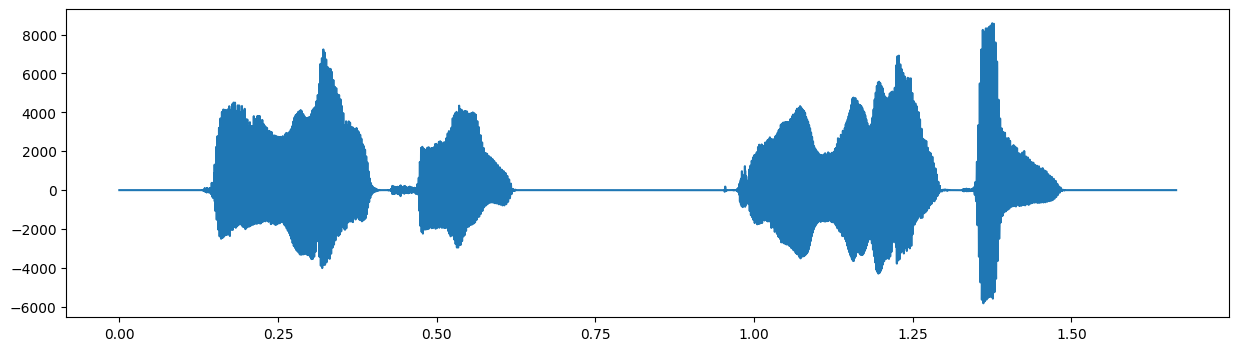

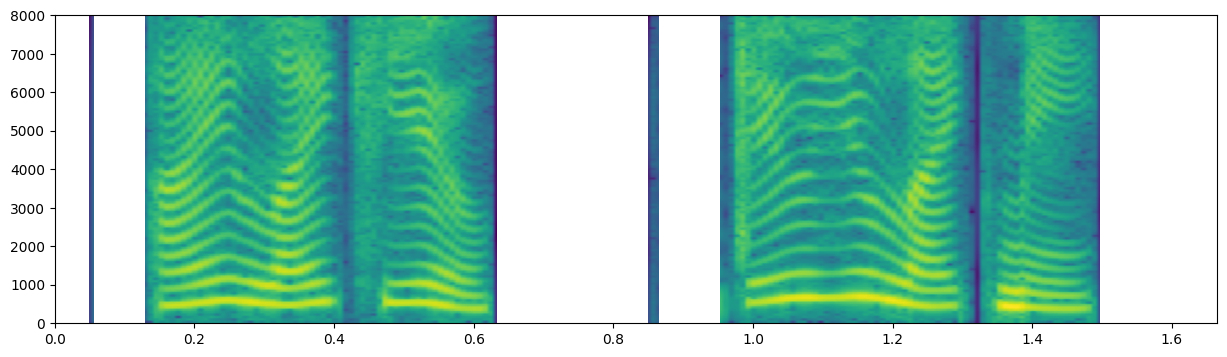

In [ ]:
mfcc = MFCC_HTK()

signal = mfcc.load_raw_signal(data_path)
signal = signal[100:]
sig_len = signal.size / 16000

plt.figure(figsize = (15, 4))
t = np.linspace(0, sig_len, signal.size)
plt.plot(t, signal)
plt.figure(figsize=(15, 4))
s = plt.specgram(signal, Fs=16000)
plt.xlim(0, sig_len)

In [ ]:
print("before " +  str(np.mean(signal)))

signal = signal - np.mean(signal)

print("after" + str(np.mean(signal)))

before 0.43412656707454395
after-2.4549222183486864e-14


In [ ]:
win_shift = 160
win_len = 400

sig_len = len(signal)

win_num = np.floor((sig_len-win_len)/win_shift).astype('int') + 1
wins = []
for w in range(win_num):
    s = w * win_shift
    e = s + win_len

    win = signal[s:e].copy()

    wins.append(win)

wins = np.asarray(wins)

Text(0, 0.5, 'Amplitude correction')

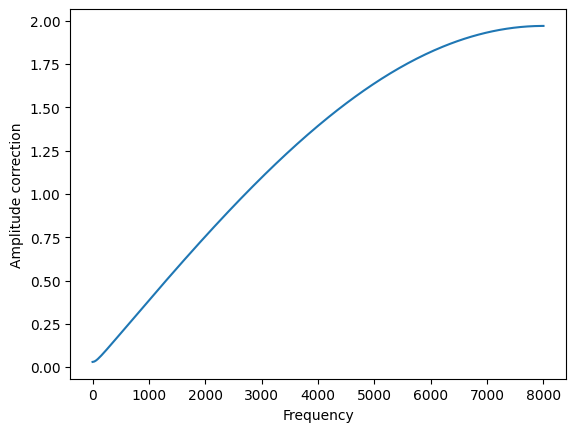

In [ ]:
k = 0.97
h = [1, -k]
f = np.linspace(0, 8000, 257)
plt.plot(f, np.abs(np.fft.rfft(h,n=512)))
plt.xlabel('Frequency')
plt.ylabel('Amplitude correction')

Text(0, 0.5, 'frequency')

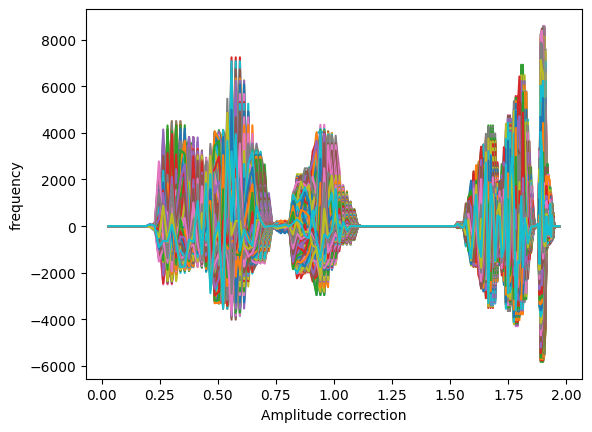

In [ ]:
for win in wins:
  win = np.hstack((win[0], win[:-1])) *k

plt.plot(np.abs(np.fft.rfft(h, n = 328)), wins)
plt.xlabel('Amplitude correction')
plt.ylabel('frequency')


Text(0.5, 1.0, 'Hamming function')

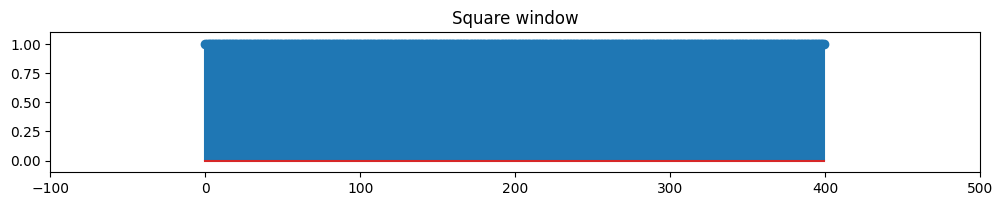

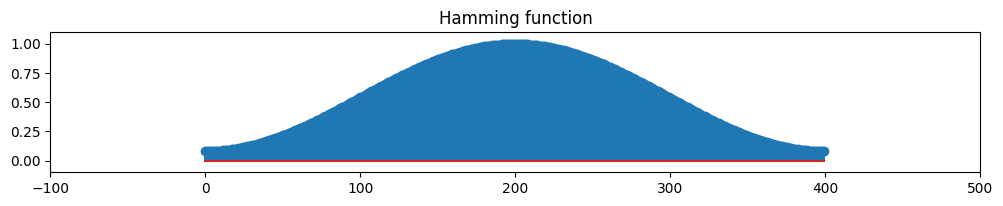

In [21]:
#演示数据
rect = np.ones(400)

plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.stem(rect)
plt.xlim(-100,500)
plt.ylim(-0.1,1.1)
plt.title('Square window')

hamm = np.hamming(400)
plt.figure(figsize=(12,4))
plt.subplot(2,1,2)
plt.stem(hamm)
plt.xlim(-100,500)
plt.ylim(-0.1,1.1)
plt.title('Hamming function')


Text(0, 0.5, 'Amplitude (log)')

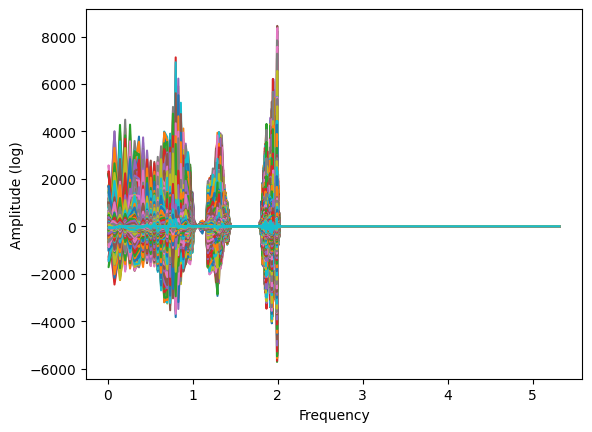

In [22]:
for win in wins:
    win *= hamm
plt.plot(np.abs(np.log(np.abs(np.fft.rfft(hamm, n=328)))), wins)
plt.xlabel('Frequency')
plt.ylabel('Amplitude (log)')

(0.0, 256.0)

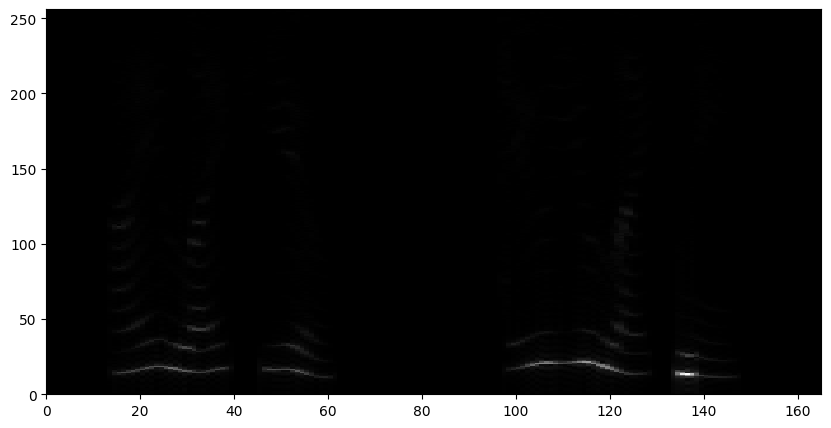

In [24]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
# sys.path.append(os.path.join(os.getcwd(),"\\data1\\"))
from data1.HTKFeat import MFCC_HTK
from data1.HTK import HCopy,HTKFile
                             
# 配置数据路径

data_path = '/content/drive/MyDrive/audio/data1/test.wav'
win_shift = 160
win_len = 400
signal = mfcc.load_raw_signal(data_path)
signal = signal[100:]
                             
sig_len = len(signal)

win_num = np.floor((sig_len-win_len)/win_shift).astype('int')+1


wins=[]
for w in range(win_num):
        s=w*win_shift
        e=s+win_len
                             
        win=signal[s:e].copy()
                             
        wins.append(win)
                             
wins=np.asarray(wins)
fft_len=(2**(np.floor(np.log2(win_len))+1)).astype('int')
ffts=[]
for win in wins:
        win=np.abs(np.fft.rfft(win,n=fft_len)[:-1])
        ffts.append(win)
                             
ffts=np.asarray(ffts)
                             
plt.figure(figsize=(10,5))
plt.pcolormesh(ffts.T,cmap='gray')
plt.xlim(0,win_num)
plt.ylim(0,fft_len/2)


Text(0, 0.5, 'Mel')

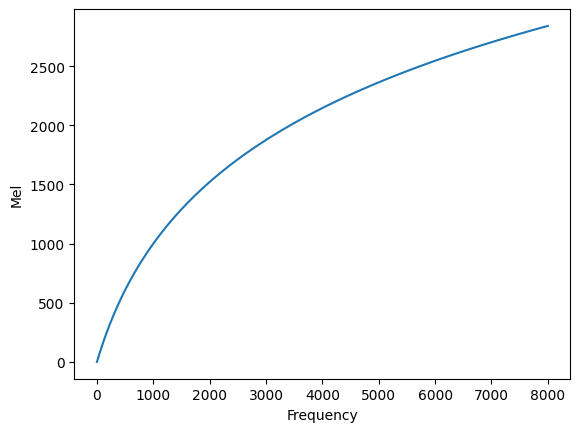

In [25]:
freq2mel = lambda freq: 1127*(np.log(1+((freq)/700.0)))

f = np.linspace(0,8000,1000)
m = freq2mel(f)

plt.plot(f,m)
plt.xlabel('Frequency')
plt.ylabel('Mel')


(0.0, 256.0)

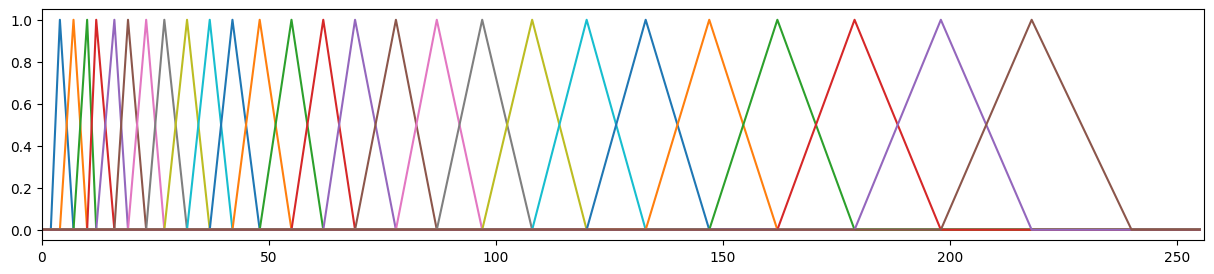

In [26]:
mfcc.create_filter(26)
#我设置了多次不同的滤波器数量以查看图形

plt.figure(figsize=(15,3))
for f in mfcc.filter_mat.T:
        plt.plot(f)
plt.xlim(0,256)


(0.0, 26.0)

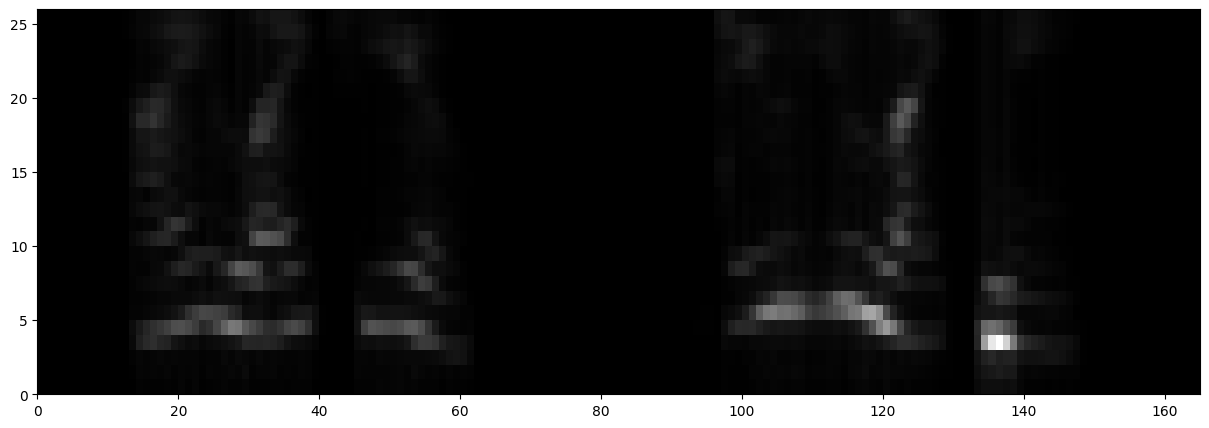

In [27]:
melspec=[]
for f in ffts:
        m = np.dot(f,mfcc.filter_mat)
        melspec.append(m)
melspec=np.asarray(melspec)

plt.figure(figsize=(15,5))
plt.pcolormesh(melspec.T,cmap='gray')
plt.xlim(0,win_num)
plt.ylim(0,26)


(0.0, 26.0)

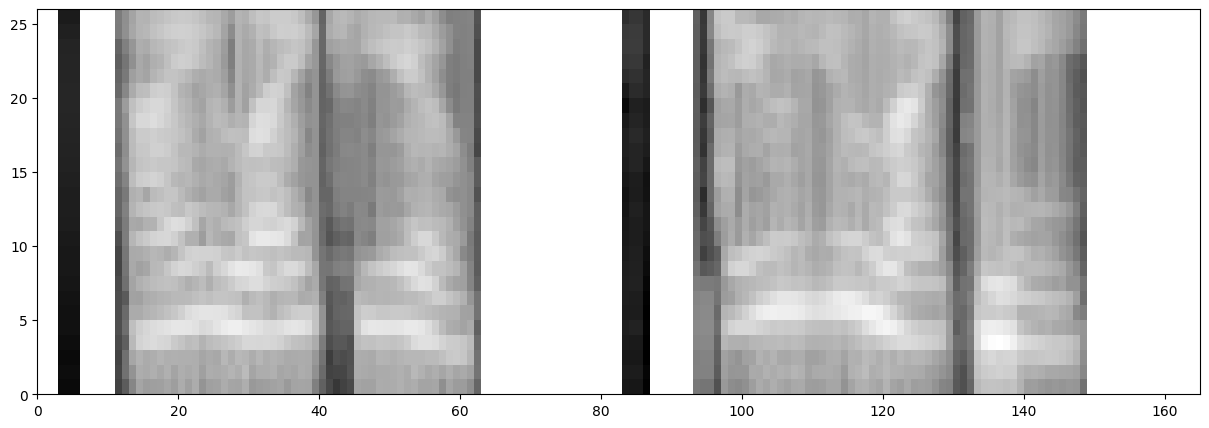

In [28]:
mels = np.log(melspec)

plt.figure(figsize=(15,5))
plt.pcolormesh(mels.T,cmap='gray')
plt.xlim(0,win_num)
plt.ylim(0,26)


Text(0, 0.5, 'MFCCs')

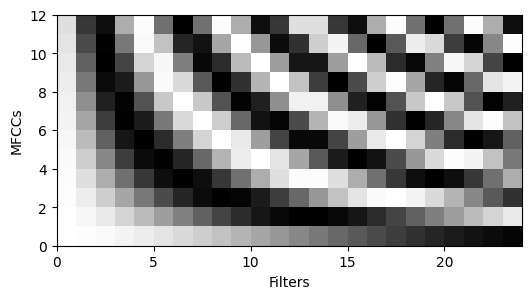

In [29]:
filter_num = 26
mfcc_num = 12

dct_base = np.zeros((filter_num,mfcc_num));
for m in range(mfcc_num):
    dct_base[:,m]=np.cos((m+1)*np.pi/filter_num*(np.arange(filter_num)+0.5))
    
plt.figure(figsize=(6,3))
plt.pcolormesh(dct_base.T,cmap='gray')
plt.xlim(0,24)
plt.ylim(0,12)
plt.xlabel('Filters')
plt.ylabel('MFCCs')


(0.0, 12.0)

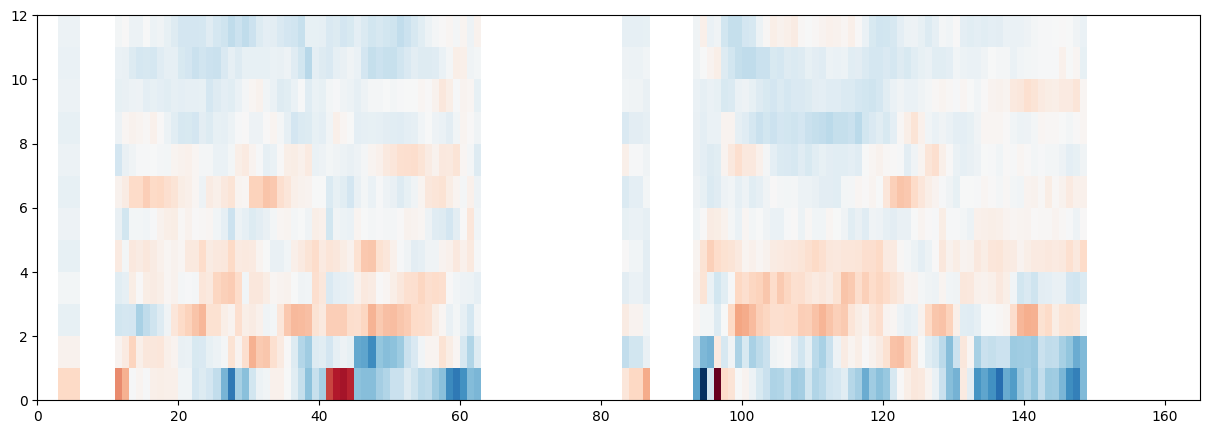

In [30]:
#将梅尔频谱图与DCT矩阵进行矩阵乘法以获得 MFCC
filter_num=26
mfcc_num=12

mfccs=[]
for m in mels:
    c=np.dot(m,dct_base)
    mfccs.append(c)
mfccs=np.asarray(mfccs)
plt.figure(figsize=(15,5))
plt.pcolormesh(mfccs.T,cmap='RdBu')
plt.xlim(0,win_num)
plt.ylim(0,mfcc_num)


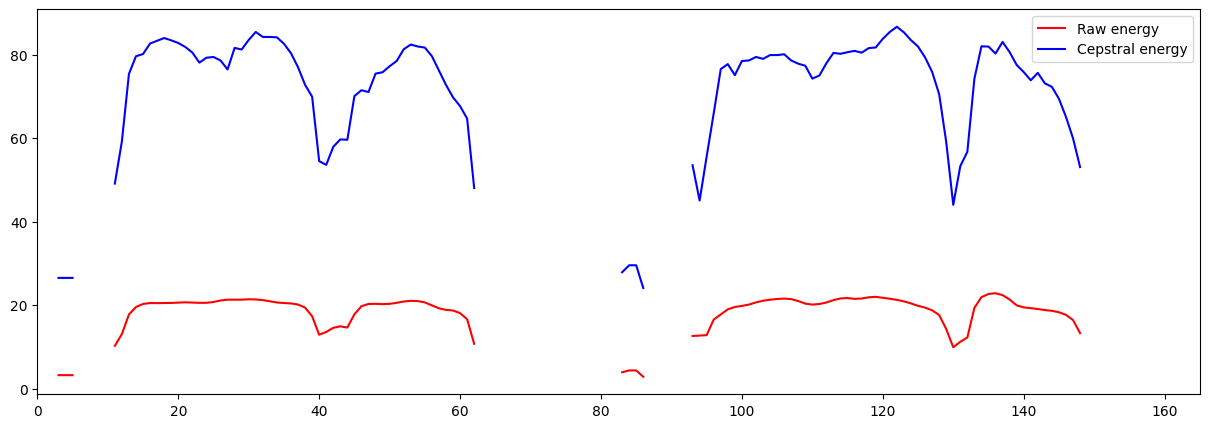

In [31]:
mfnorm = np.sqrt(2.0 / filter_num)
mfccs*=mfnorm

raw_energy=[]
for win in wins:
        raw_energy.append(np.log(np.sum(win**2)))
raw_energy=np.asarray(raw_energy)
                                        
ceps_energy=[]
for m in mels:
        ceps_energy.append(np.sum(m)*mfnorm)
ceps_energy=np.asarray(ceps_energy)

plt.figure(figsize=(15,5))
plt.plot(raw_energy,'r', label='Raw energy')
plt.plot(ceps_energy,'b',label='Cepstral energy')
plt.xlim(0,win_num)
plt.legend()
